In [1]:
from google.colab import files
uploaded = files.upload()


Saving college_feedback_sample.csv to college_feedback_sample.csv


In [2]:
import pandas as pd
df = pd.read_csv("college_feedback_sample.csv")
df.head()


,Name,Email,Rating,Comments
0,Ananya,ananya@example.com,5,Amazing event! Loved the organization and fun ...
1,Ravi,ravi@example.com,4,"Good effort, could improve sound quality."
2,Sneha,sneha@example.com,3,"It was okay, not very exciting."
3,Karthik,karthik@example.com,5,"Great work by the volunteers, had a wonderful ..."
4,Divya,divya@example.com,2,Too crowded and disorganized.


In [3]:
!pip install textblob
!pip install vaderSentiment
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 573.2 kB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud


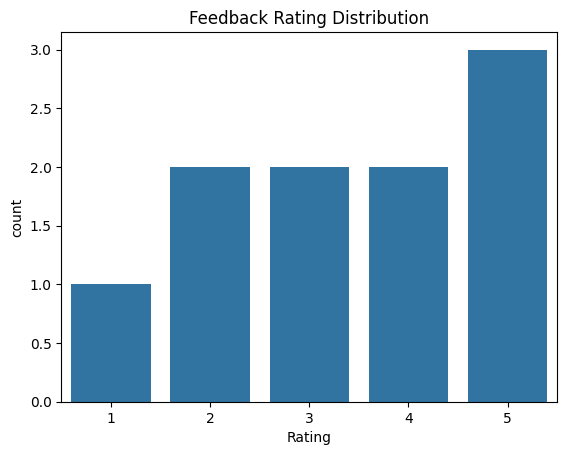

In [5]:
# Example rating distribution
sns.countplot(x='Rating', data=df)
plt.title("Feedback Rating Distribution")
plt.show()


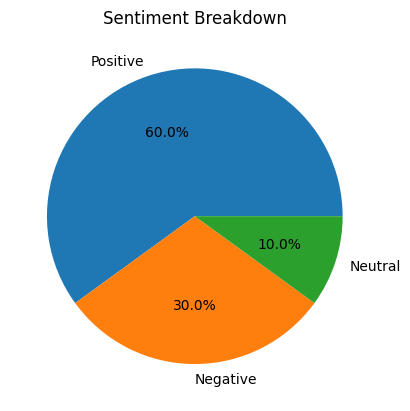

In [6]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Comments'].apply(get_sentiment)
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Sentiment Breakdown")
plt.ylabel('')
plt.show()


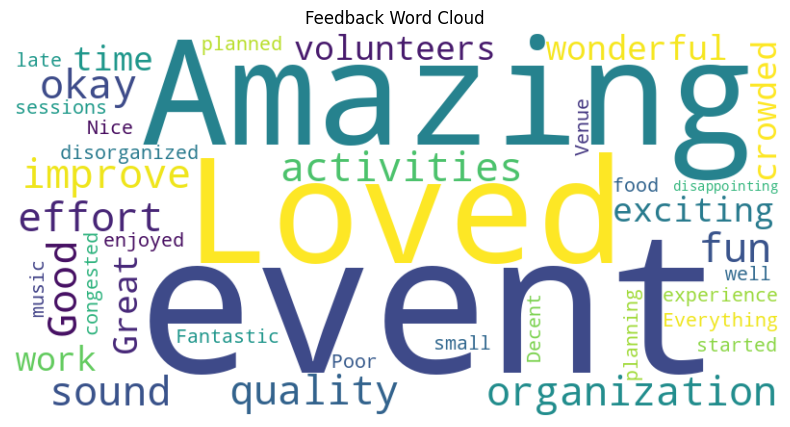

In [7]:
text = " ".join(df['Comments'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Feedback Word Cloud")
plt.show()


In [8]:
df.to_csv("feedback_analysis_results.csv", index=False)
files.download("feedback_analysis_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>